In [34]:
import pandas as pd
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [62]:
path = 'E:\MEM-Problem-C\data\data_processed_Q3.csv'
dataset = pd.read_csv(path)
dataset = dataset.drop(['match_id'], axis=1) # dataset drop了match_id这一列
data = pd.read_csv(path)
dataset = dataset[300:] # dataset目前剔除了第一把比赛的数据
data # data目前是所有数据
dataset.reset_index(drop=True, inplace=True)
dataset

,point_diff,distance_run,win_streak,unf_err,serve,ace,elapsed_time,net_pt_won,last_round_rally_cnt,double_fault,break_pt_missed,distance_lag1,distance_lag2,rally_cnt_lag1,rally_cnt_lag2,label
0,0,13.646,0,0,0,0,0,0,1,0,0,3.767,12.292,1,1,1
1,1,6.596,1,0,0,0,36,0,2,0,0,13.646,3.767,1,1,0
2,0,72.403,0,0,0,0,22,0,1,0,0,6.596,13.646,2,1,0
3,-1,17.565,0,0,0,0,54,0,9,0,0,72.403,6.596,1,2,1
4,0,3.195,1,0,0,0,40,0,2,0,0,17.565,72.403,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,-1,38.620,0,0,1,0,27,0,2,0,0,6.772,4.150,1,2,1
6980,0,17.533,1,0,1,0,45,1,11,0,0,38.620,6.772,2,1,1
6981,1,10.882,2,0,1,0,37,0,5,0,0,17.533,38.620,11,2,0
6982,0,7.893,0,0,1,0,32,0,4,0,0,10.882,17.533,5,11,1


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # 最大最小操作，映射到[0, 1]区间
columns = dataset.columns[:-1] # 取出dataset的除了label的所有列名称
print(columns)
scaler.fit(dataset[columns].values) # 学习除了label那一列，每列的最大最小值
dataset[columns] = scaler.transform(dataset[columns].values) # 对除了label的每列，根据之前计算的最大最小值，进行归一化操作

Index(['point_diff', 'distance_run', 'win_streak', 'unf_err', 'serve', 'ace',
       'elapsed_time', 'net_pt_won', 'last_round_rally_cnt', 'double_fault',
       'break_pt_missed', 'distance_lag1', 'distance_lag2', 'rally_cnt_lag1',
       'rally_cnt_lag2'],
      dtype='object')


In [64]:
xtrain, xvalid, ytrain, yvalid = train_test_split(dataset[columns].values,dataset['label'].values,random_state=620,test_size=0.2)

model = LGBMClassifier(random_state=30)
model.fit(xtrain,ytrain)

[LightGBM] [Info] Number of positive: 2857, number of negative: 2730
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 5587, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511366 -> initscore=0.045471
[LightGBM] [Info] Start training from score 0.045471


LGBMClassifier(random_state=30)

In [65]:
pred_path = 'E:\MEM-Problem-C\data\data_processed_Q4.csv'
pre_data = pd.read_csv(pred_path)
pre_dataset = pd.read_csv(pred_path)
pre_dataset = pre_dataset.drop(['match_id'], axis=1)

In [66]:
acc_list = []
index = pre_data[pre_data.match_id == 0].index  # 取出第一场比赛的索引列表
test = pre_dataset.iloc[index]  # 从预处理数据中取出第一场比赛，用来验证模型
pred_01 = model.predict(test[columns].values)
pred_01 = pd.DataFrame({'label': pred_01})
test.reset_index(drop=True, inplace=True)
label = pd.DataFrame({'score':test['label']})
err_sum = sum(abs(pred_01['label'] - label['score']))
acc_rate = (len(pred_01) - err_sum) /len(pred_01)
acc_list.append(acc_rate)
acc = pd.DataFrame(acc_list)
acc

,0
0,0.764706


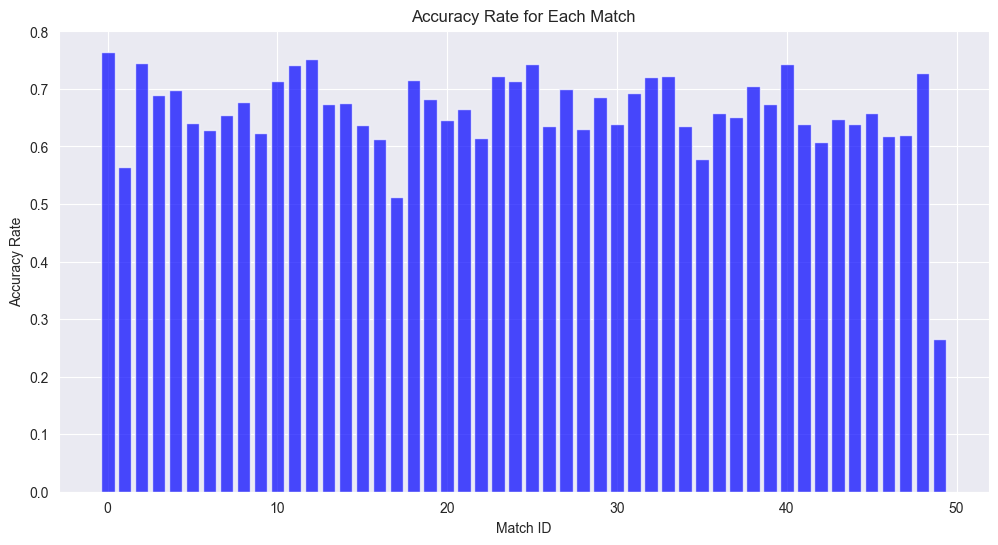

In [67]:
acc_list = []
for i in range(50):
    index = pre_data[pre_data.match_id == i].index  # 取出第一场比赛的索引列表
    test = pre_dataset.iloc[index]  # 从预处理数据中取出第一场比赛，用来验证模型
    pred_01 = model.predict(test[columns].values)
    pred_01 = pd.DataFrame({'label': pred_01})
    test.reset_index(drop=True, inplace=True)
    label = pd.DataFrame({'score':test['label']})
    err_sum = sum(abs(pred_01['label'] - label['score']))
    acc_rate = (len(pred_01) - err_sum) /len(pred_01)
    acc_list.append(acc_rate)
acc = pd.DataFrame(acc_list)
x_values = list(range(50))  # 取决于你的数据范围

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(x_values, acc_list, color='blue', alpha=0.7)

# 添加标题和标签
plt.title('Accuracy Rate for Each Match')
plt.xlabel('Match ID')
plt.ylabel('Accuracy Rate')

# 显示柱状图
plt.show()

In [68]:
pred_path = 'E:\MEM-Problem-C\data\data_processed_Q4-women.csv'
pre_data = pd.read_csv(pred_path)
pre_dataset = pd.read_csv(pred_path)
pre_dataset = pre_dataset.drop(['match_id'], axis=1)

0    0.702726
dtype: float64


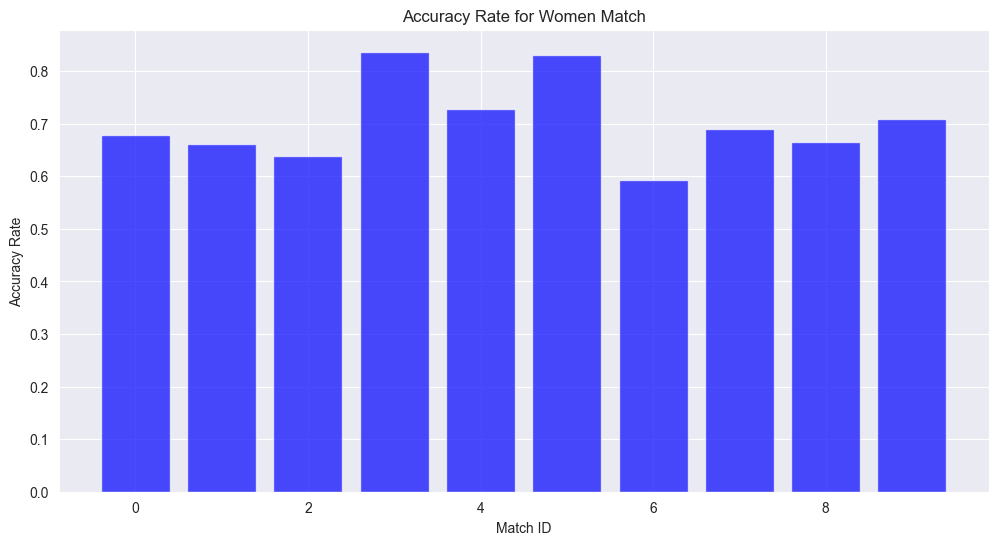

In [71]:
acc_list = []
for i in range(10):
    index = pre_data[pre_data.match_id == i].index  # 取出第一场比赛的索引列表
    test = pre_dataset.iloc[index]  # 从预处理数据中取出第一场比赛，用来验证模型
    pred_01 = model.predict(test[columns].values)
    pred_01 = pd.DataFrame({'label': pred_01})
    test.reset_index(drop=True, inplace=True)
    label = pd.DataFrame({'score':test['label']})
    err_sum = sum(abs(pred_01['label'] - label['score']))
    acc_rate = (len(pred_01) - err_sum) /len(pred_01)
    acc_list.append(acc_rate)
acc = pd.DataFrame(acc_list)
print(acc.mean())
x_values = list(range(10))  # 取决于你的数据范围

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(x_values, acc_list, color='blue', alpha=0.7)

# 添加标题和标签
plt.title('Accuracy Rate for Women Match')
plt.xlabel('Match ID')
plt.ylabel('Accuracy Rate')

# 显示柱状图
plt.show()